In [6]:
#calling various library
import numpy as np
from math import *
from random import *
import matplotlib.pyplot as plt
from pylab import rcParams
from datetime import datetime



In [7]:
                                                                  # no of points we want in the msd plot
x_arr = np.loadtxt('x_arr_vts_aniso02.txt')                                      #all elements are in micron
y_arr = np.loadtxt('y_arr_vts_aniso02.txt')                                       #all elements are in micron
t_arr = np.loadtxt('dt_arr_vts_aniso02.txt')


In [8]:
dt_min=1e-8                                                                   #initial time step
dt_max=1e4                                                                   #final time step in msd graph
msd_xarr=[]                                                                    #mean squared x
msd_yarr=[]                                                                    #mean squared y
msd_rarr=[]                                                                    #r is the msd array
mean_t_arr=[]                                                                  #dtarray for msd plot

N = 30    
timelaglog= np.logspace( np.log10(dt_min), np.log10(dt_max), num=N ) #nonzero points for msd plot(distributed linearly in log scale)
counterarray=[]                                                                 #no of data averaging for particular dt


In [9]:
#from numba import jit
#@jit(nopython=True)

for m in range(0,len(timelaglog)-1):
    print(m)
    r=0 
    x=0
    y=0 
    count=0                                                                   #counter no of elements for data avraging for particular dt
    for i in range(len(t_arr)):
        for j in range(i+1,len(t_arr)):
            timelag = t_arr[j]-t_arr[i]                                       #time difference between i'th and j'th elements
            if timelag >= timelaglog[m] and timelag <= timelaglog[m+1]:
                x = x+((x_arr[j]-x_arr[i])**2)
                y = y+((y_arr[j]-y_arr[i])**2)
                count = count+1
    x=float(x/count)
    y=float(y/count)
    r=float(x+y) 
    msd_xarr.append(x)
    msd_yarr.append(y)                                                          #msd for a particual dt
    msd_rarr.append(r)
    mean_t_arr.append(np.sqrt(timelaglog[m]*timelaglog[m+1]))
    counterarray.append(count)


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28


In [8]:
np.savetxt('msd_x_aniso02.txt',msd_xarr)
np.savetxt('msd_y_aniso02.txt',msd_yarr)
np.savetxt('msd_r_aniso02.txt',msd_rarr)
np.savetxt('t_arr_formsd_aniso02.txt',mean_t_arr)
np.savetxt('counterarray_aniso02.txt',counterarray)


Text(0.5, 0, '$tau (s)$')

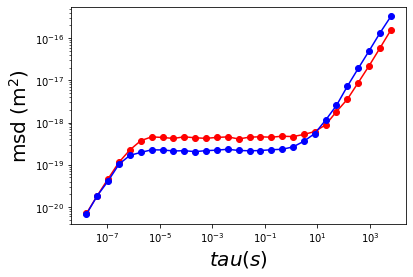

In [10]:


plt.loglog(mean_t_arr,msd_xarr,'ro-')
plt.loglog(mean_t_arr,msd_yarr,'bo-')
plt.ylabel('msd (m$^2$)',size=20)
plt.xlabel(r'$tau (s)$', size =20)
#plt.xscale('log')
#plt.yscale('log')


In [8]:
import numpy
a = numpy.asarray([ mean_t_arr, msd_rarr, msd_xarr, msd_yarr])
index = ['time', 'msd_r', 'msd_x', 'msd_y']

import pandas as pd
df_a = pd.DataFrame(a, index)
df_a_tp = pd.DataFrame.transpose(df_a)

numpy.savetxt("mvm_vts_aniso.csv", df_a_tp, delimiter=",")

In [ ]:
msd_r_iso = np.loadtxt('msd_r_iso.txt')   

In [9]:
import numpy
ab = numpy.asarray([ mean_t_arr, msd_rarr, msd_r_iso])
index = ['time', 'msd_r_aniso', 'msd_r_iso']

import pandas as pd
df_ab = pd.DataFrame(ab, index)
df_ab_tp = pd.DataFrame.transpose(df_ab)

numpy.savetxt("mvm_vts_iso_aniso.csv", df_a_tp, delimiter=",")